In [ ]:
!pip install sastrawi wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install gensim scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
import pandas as pd
import numpy as np
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
df = pd.read_csv('ssmresponses.csv')
df.head()


,Timestamp,Angkatan,Fakultas,Region,Apakah Anda pernah berpartisipasi dalam forum diskusi selama perkuliahan?,Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,...,Respon dari dosen dalam forum secara signifikan meningkatkan pengalaman belajar saya.,Saya lebih memilih mempelajari materi melalui forum diskusi dibandingkan menonton video pembelajaran.,Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri.,"Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri seperti Coursera, edX, atau platform sejenis.","Menurut Anda, apa saja faktor yang dapat menciptakan suasana pembelajaran yang optimal?",Lingkungan seperti apa yang paling membantu Anda untuk fokus belajar?,Apa jenis aktivitas belajar yang paling sesuai dengan gaya belajar Anda?,"Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?",Apa faktor yang menurut Anda paling berkontribusi terhadap keterlibatan Anda dalam pembelajaran berbasis forum asinkron di BINUS?,"Dalam pandangan Anda, bagaimana forum pembelajaran asinkron dapat ditingkatkan agar lebih menarik dan bermanfaat bagi mahasiswa?"
0,05/05/2025 15:37:10,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,4.0,2.0,4.0,5.0,2.0,...,4.0,4.0,3.0,NaN,"Interaksi aktif dengan dosen, Fleksibilitas wa...","Ruangan yang tenang tanpa gangguan, Belajar di...","Diskusi dan debat tertulis, Mengikuti kuis int...",Forum asinkron sebenarnya ngasih kesempatan ya...,Faktor paling besar sih topiknya menarik dan d...,"Biar lebih menarik, forum bisa dikasih topik y..."
1,05/05/2025 16:52:48,B28 (Binusian 2028),School of Information Systems,Kemanggisan,Tidak,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/05/2025 17:01:46,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,3.0,2.0,3.0,4.0,2.0,...,4.0,4.0,4.0,NaN,"Fleksibilitas waktu belajar, Umpan balik cepat...",Ruang bersama dengan suasana belajar (misalnya...,"Menonton video penjelasan, Mengikuti kuis inte...",sama aja semuanya,waktu deadline,tidaka ad
3,05/05/2025 17:03:12,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,5.0,2.0,4.0,5.0,3.0,...,4.0,2.0,2.0,NaN,"Interaksi aktif dengan dosen, Umpan balik cepa...","Ruangan yang tenang tanpa gangguan, Belajar sa...","Membaca materi mandiri, Menonton video penjela...","Menurut saya, untuk orang yang tidak begitu mu...","Menurut saya, faktor yang paling berkontribusi...","Menurut saya, forum pembelajaran asinkron dapa..."
4,05/05/2025 17:03:15,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,4.0,2.0,4.0,2.0,2.0,...,2.0,2.0,2.0,NaN,"Interaksi aktif dengan dosen, Umpan balik cepa...","Ruangan yang tenang tanpa gangguan, Belajar sa...","Membaca materi mandiri, Menonton video penjelasan",iya,Terpaksa,"dosen tidak hanya memberikan tugas, tetapi jug..."


In [ ]:

stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def clean_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    stemmed = [stemmer.stem(t) for t in tokens]
    return ' '.join(stemmed)

df['Q1_clean'] = df['Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?'].astype(str).apply(clean_text)

df[['Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?', 'Q1_clean']].head()


,"Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?",Q1_clean
0,Forum asinkron sebenarnya ngasih kesempatan ya...,forum asinkron benar ngasih sempat sama rajin ...
1,NaN,nan
2,sama aja semuanya,sama aja semua
3,"Menurut saya, untuk orang yang tidak begitu mu...",orang mudah tangkap materi forum ajar asinkron...
4,iya,iya


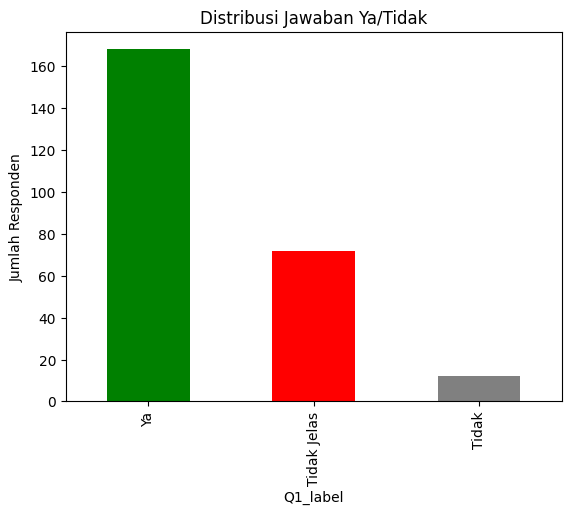

In [ ]:
def detect_label(text):
    text = text.lower()
    if 'ya' in text or 'iya' in text:
        return 'Ya'
    elif 'tidak' in text or 'nggak' in text or 'ga' in text or 'kaga' in text or 'ngga' in text:
        return 'Tidak'
    else:
        return 'Tidak Jelas'

df['Q1_label'] = df['Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?'].astype(str).apply(detect_label)

df['Q1_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], title='Distribusi Jawaban Ya/Tidak')
plt.ylabel('Jumlah Responden')
plt.show()


In [ ]:
texts_q1 = [text.split() for text in df['Q1_clean'] if text.strip() != ""]
dictionary_q3 = corpora.Dictionary(texts_q1)
corpus_q3 = [dictionary_q3.doc2bow(text) for text in texts_q1]

lda_q1 = gensim.models.LdaModel(corpus=corpus_q3,
                                id2word=dictionary_q3,
                                num_topics=3,
                                random_state=42,
                                passes=15,
                                alpha='auto',
                                per_word_topics=True)

topics_q1 = lda_q1.print_topics()
for i, topic in topics_q1:
    print(f"\nTopik {i+1}:\n{topic}")


Topik 1:
0.102*"tara" + 0.073*"sempat" + 0.072*"semua" + 0.059*"mahasiswa" + 0.053*"beri" + 0.049*"forum" + 0.042*"iya" + 0.035*"ajar" + 0.032*"libat" + 0.024*"asinkron"

Topik 2:
0.045*"mahasiswa" + 0.038*"lebih" + 0.035*"semua" + 0.021*"forum" + 0.017*"beri" + 0.016*"untung" + 0.016*"libat" + 0.015*"buat" + 0.014*"cukup" + 0.014*"sempat"

Topik 3:
0.043*"mahasiswa" + 0.041*"lebih" + 0.039*"forum" + 0.036*"nan" + 0.035*"ajar" + 0.032*"untung" + 0.025*"semua" + 0.022*"asinkron" + 0.019*"waktu" + 0.019*"milik"


In [ ]:
df['Q2_clean'] = df['Apa faktor yang menurut Anda paling berkontribusi terhadap keterlibatan Anda dalam pembelajaran berbasis forum asinkron di BINUS?'].astype(str).apply(clean_text)
df['Q3_clean'] = df['Dalam pandangan Anda, bagaimana forum pembelajaran asinkron dapat ditingkatkan agar lebih menarik dan bermanfaat bagi mahasiswa?'].astype(str).apply(clean_text)

df[['Apa faktor yang menurut Anda paling berkontribusi terhadap keterlibatan Anda dalam pembelajaran berbasis forum asinkron di BINUS?', 'Q2_clean', 'Dalam pandangan Anda, bagaimana forum pembelajaran asinkron dapat ditingkatkan agar lebih menarik dan bermanfaat bagi mahasiswa?', 'Q3_clean']].head()


,Apa faktor yang menurut Anda paling berkontribusi terhadap keterlibatan Anda dalam pembelajaran berbasis forum asinkron di BINUS?,Q2_clean,"Dalam pandangan Anda, bagaimana forum pembelajaran asinkron dapat ditingkatkan agar lebih menarik dan bermanfaat bagi mahasiswa?",Q3_clean
0,Faktor paling besar sih topiknya menarik dan d...,faktor paling besar sih topik tarik dosen akti...,"Biar lebih menarik, forum bisa dikasih topik y...",biar lebih tarik forum kasih topik relate sama...
1,NaN,nan,NaN,nan
2,waktu deadline,waktu deadline,tidaka ad,tidaka ad
3,"Menurut saya, faktor yang paling berkontribusi...",faktor paling kontribusi libat ajar bas forum ...,"Menurut saya, forum pembelajaran asinkron dapa...",forum ajar asinkron tingkat cara buat topik di...
4,Terpaksa,paksa,"dosen tidak hanya memberikan tugas, tetapi jug...",dosen beri tugas summary contoh materi bahas


In [ ]:
texts_q2 = [text.split() for text in df['Q2_clean'] if text.strip() != ""]

dictionary_q2 = corpora.Dictionary(texts_q2)
corpus_q2 = [dictionary_q2.doc2bow(text) for text in texts_q2]

lda_q2 = gensim.models.LdaModel(corpus=corpus_q2,
                                id2word=dictionary_q2,
                                num_topics=3,
                                random_state=42,
                                passes=15,
                                alpha='auto',
                                per_word_topics=True)

topics_q2 = lda_q2.print_topics()
for i, topic in topics_q2:
    print(f"\nTopik {i+1}:\n{topic}")



Topik 1:
0.051*"nilai" + 0.049*"tugas" + 0.041*"wajib" + 0.033*"absen" + 0.027*"absensi" + 0.022*"diskus" + 0.019*"butuh" + 0.017*"tanya" + 0.014*"aktif" + 0.012*"mahasiswa"

Topik 2:
0.044*"waktu" + 0.041*"absensi" + 0.040*"forum" + 0.025*"fleksibilitas" + 0.020*"nilai" + 0.019*"jawab" + 0.018*"faktor" + 0.016*"lebih" + 0.014*"isi" + 0.014*"dapat"

Topik 3:
0.042*"dosen" + 0.037*"nan" + 0.037*"forum" + 0.036*"materi" + 0.029*"aktif" + 0.028*"ajar" + 0.025*"diskusi" + 0.023*"mahasiswa" + 0.022*"faktor" + 0.021*"topik"


In [ ]:
texts_q3 = [text.split() for text in df['Q3_clean'] if text.strip() != ""]
dictionary_q3 = corpora.Dictionary(texts_q3)
corpus_q3 = [dictionary_q3.doc2bow(text) for text in texts_q3]

lda_q3 = gensim.models.LdaModel(corpus=corpus_q3,
                                id2word=dictionary_q3,
                                num_topics=3,
                                random_state=42,
                                passes=15,
                                alpha='auto',
                                per_word_topics=True)

topics_q3 = lda_q3.print_topics()
for i, topic in topics_q3:
    print(f"\nTopik {i+1}:\n{topic}")



Topik 1:
0.045*"beri" + 0.034*"forum" + 0.032*"dosen" + 0.031*"lebih" + 0.029*"diskusi" + 0.027*"mahasiswa" + 0.023*"aktif" + 0.019*"ajar" + 0.016*"topik" + 0.016*"materi"

Topik 2:
0.062*"lebih" + 0.040*"buat" + 0.038*"tarik" + 0.035*"nan" + 0.028*"interaktif" + 0.027*"forum" + 0.021*"mahasiswa" + 0.015*"video" + 0.014*"ajar" + 0.013*"baik"

Topik 3:
0.028*"beri" + 0.028*"dosen" + 0.027*"materi" + 0.023*"mahasiswa" + 0.021*"forum" + 0.021*"lebih" + 0.020*"tugas" + 0.020*"tanya" + 0.016*"jawab" + 0.014*"banyak"


In [ ]:
def plot_lda_topics(lda_model, dictionary, question_label):
    topics = lda_model.show_topics(num_topics=3, num_words=10, formatted=False)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # sharey=False untuk label sendiri

    for i, (topic_id, word_probs) in enumerate(topics):
        words, probs = zip(*word_probs)
        ax = axes[i]
        bars = ax.barh(range(len(words)), probs, color='steelblue')
        ax.invert_yaxis()
        ax.set_title(f"{question_label} - Topic {topic_id+1}")
        ax.set_xlabel("Weight")

        ax.set_yticks(range(len(words)))
        ax.set_yticklabels(words)

        for j, bar in enumerate(bars):
            ax.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                    f"{probs[j]:.3f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()


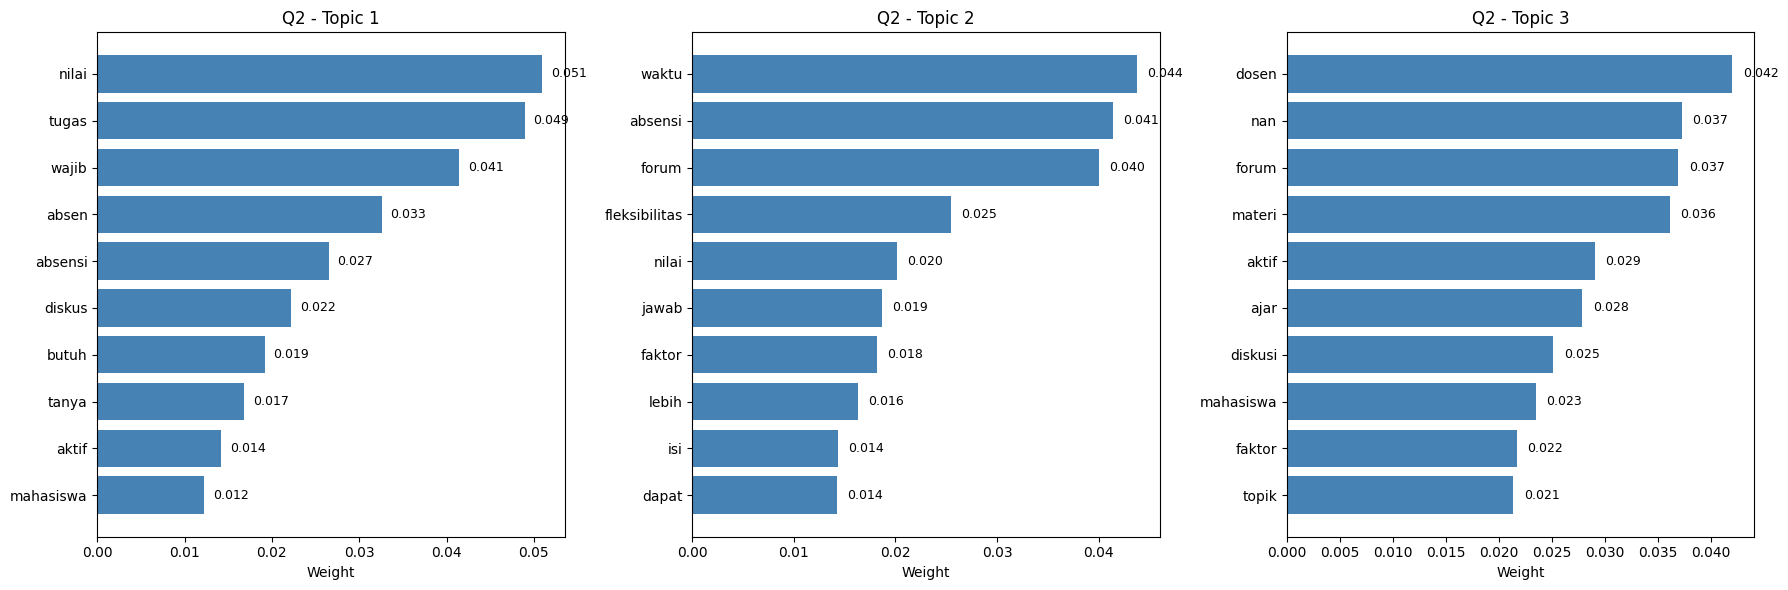

In [ ]:
plot_lda_topics(lda_q2, dictionary_q2, "Q2")

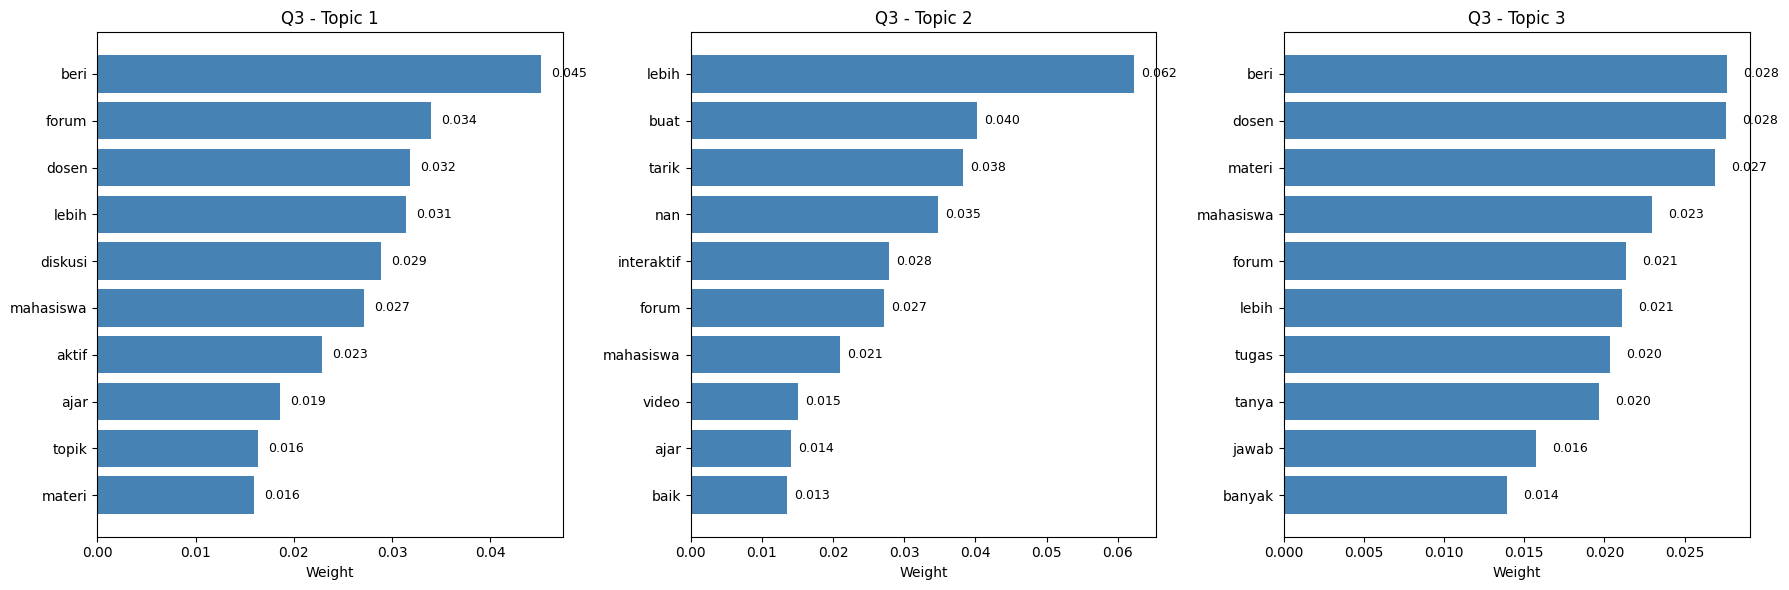

In [ ]:
plot_lda_topics(lda_q3, dictionary_q3, "Q3")